# Data Mining on output_sales.xlsx

This notebook demonstrates data mining on the `output_sales.xlsx` dataset using regression, clustering, and classification. It also defines and fulfills 6 KPIs based on the mined data.

## Data Loading

Load the `output_sales.xlsx` file into a pandas DataFrame.

In [1]:
import pandas as pd

try:
    df = pd.read_excel("output_sales.xlsx")
    display(df.head())
except FileNotFoundError:
    print("Error: 'output_sales.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Id_Penjualan,Tanggal,Id_Pelanggan,Id_Produk,Id_Karyawan,Jumlah,Total_Harga,Metode_Pembayaran,Nama_Produk,Kategori,Nama_Pelanggan,No_Telepon,Nama_Karyawan,Posisi
0,PJ001,2025-05-01,C001,P012,K001,100,50000,Tunai,Fotokopi Hitam Putih,Layanan,Dimas Pratama,81234567890,Andi Setiawan,Kasir
1,PJ002,2025-05-01,C002,P013,K002,50,50000,Tunai,Fotokopi Warna,Layanan,Rina Susanti,81234567891,Siti Nurhayati,Operator Mesin
2,PJ003,2025-05-02,C003,P015,K001,30,60000,Debit,Print Dokumen Warna,Layanan,Andi Wijaya,81234567892,Andi Setiawan,Kasir
3,PJ004,2025-05-02,C004,P016,K004,20,160000,Tunai,Laminating A4,Layanan,Siti Nurhaliza,81234567893,Zildan Chesta,Admin
4,PJ005,2025-05-03,C005,P018,K003,10,60000,QRIS,Cetak Foto 4R,Layanan,Budi Santoso,81234567894,Budi Pratama,Staff Gudang


## Data Exploration

Explore the dataset: shape, types, statistics, missing values, and distributions.

Shape: (50, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id_Penjualan       50 non-null     object        
 1   Tanggal            50 non-null     datetime64[ns]
 2   Id_Pelanggan       50 non-null     object        
 3   Id_Produk          50 non-null     object        
 4   Id_Karyawan        50 non-null     object        
 5   Jumlah             50 non-null     int64         
 6   Total_Harga        50 non-null     int64         
 7   Metode_Pembayaran  50 non-null     object        
 8   Nama_Produk        50 non-null     object        
 9   Kategori           50 non-null     object        
 10  Nama_Pelanggan     50 non-null     object        
 11  No_Telepon         50 non-null     int64         
 12  Nama_Karyawan      50 non-null     object        
 13  Posisi             50 non-null     object   

,Tanggal,Jumlah,Total_Harga,No_Telepon
count,50,50.000000,5.000000e+01,5.000000e+01
mean,2025-05-13 00:00:00,25.560000,3.518400e+05,8.123457e+10
min,2025-05-01 00:00:00,2.000000,2.000000e+04,8.123457e+10
25%,2025-05-07 00:00:00,15.000000,8.500000e+04,8.123457e+10
50%,2025-05-13 00:00:00,22.500000,2.000000e+05,8.123457e+10
75%,2025-05-19 00:00:00,30.000000,3.712500e+05,8.123457e+10
max,2025-05-25 00:00:00,100.000000,3.600000e+06,8.123457e+10
std,NaN,17.072666,5.490003e+05,9.576523e+00



Describe (categorical):


,Id_Penjualan,Id_Pelanggan,Id_Produk,Id_Karyawan,Metode_Pembayaran,Nama_Produk,Kategori,Nama_Pelanggan,Nama_Karyawan,Posisi
count,50,50,50,50,50,50,50,50,50,50
unique,50,34,40,4,4,40,6,34,4,4
top,PJ001,C001,P012,K001,Tunai,Fotokopi Hitam Putih,Layanan,Dimas Pratama,Andi Setiawan,Kasir
freq,1,2,2,14,18,2,22,2,14,14



Missing values:


Id_Penjualan         0
Tanggal              0
Id_Pelanggan         0
Id_Produk            0
Id_Karyawan          0
Jumlah               0
Total_Harga          0
Metode_Pembayaran    0
Nama_Produk          0
Kategori             0
Nama_Pelanggan       0
No_Telepon           0
Nama_Karyawan        0
Posisi               0
dtype: int64


Value counts for categorical columns:

Id_Penjualan:


Id_Penjualan
PJ001    1
PJ002    1
PJ003    1
PJ004    1
PJ005    1
PJ006    1
PJ007    1
PJ008    1
PJ009    1
PJ010    1
PJ011    1
PJ012    1
PJ013    1
PJ014    1
PJ015    1
PJ016    1
PJ017    1
PJ018    1
PJ019    1
PJ020    1
PJ021    1
PJ022    1
PJ023    1
PJ024    1
PJ025    1
PJ026    1
PJ027    1
PJ028    1
PJ029    1
PJ030    1
PJ031    1
PJ032    1
PJ033    1
PJ034    1
PJ035    1
PJ036    1
PJ037    1
PJ038    1
PJ039    1
PJ040    1
PJ041    1
PJ042    1
PJ043    1
PJ044    1
PJ045    1
PJ046    1
PJ047    1
PJ048    1
PJ049    1
PJ050    1
Name: count, dtype: int64


Id_Pelanggan:


Id_Pelanggan
C001    2
C002    2
C003    2
C004    2
C005    2
C006    2
C007    2
C008    2
C009    2
C010    2
C011    2
C012    2
C013    2
C014    2
C015    2
C016    2
C017    1
C018    1
C019    1
C020    1
C021    1
C022    1
C023    1
C024    1
C025    1
C026    1
C027    1
C028    1
C029    1
C030    1
C031    1
C032    1
C033    1
C034    1
Name: count, dtype: int64


Id_Produk:


Id_Produk
P012    2
P013    2
P018    2
P028    2
P026    2
P014    2
P035    2
P010    2
P005    2
P002    2
P020    1
P016    1
P015    1
P011    1
P001    1
P025    1
P034    1
P038    1
P003    1
P009    1
P004    1
P032    1
P031    1
P033    1
P023    1
P027    1
P036    1
P021    1
P037    1
P019    1
P007    1
P029    1
P008    1
P006    1
P017    1
P022    1
P024    1
P030    1
P039    1
P040    1
Name: count, dtype: int64


Id_Karyawan:


Id_Karyawan
K001    14
K002    14
K004    11
K003    11
Name: count, dtype: int64


Metode_Pembayaran:


Metode_Pembayaran
Tunai            18
QRIS             12
Transfer Bank    11
Debit             9
Name: count, dtype: int64


Nama_Produk:


Nama_Produk
Fotokopi Hitam Putih         2
Fotokopi Warna               2
Cetak Foto 4R                2
Buku Folio Bergaris          2
Gantungan ID Card            2
Print Dokumen Hitam Putih    2
Cetak Brosur Full Color      2
Amplop Coklat A4             2
Spidol Snowman               2
Kertas HVS F4 70gsm          2
Stapler Besar                1
Laminating A4                1
Print Dokumen Warna          1
Printer Canon G2010          1
Kertas A4 80gsm              1
Stempel Nama                 1
Poster A3                    1
Laminating KTP               1
Tinta Printer Canon          1
Binder Klip 32mm             1
Pulpen Pilot G2              1
Print Stiker Label           1
Jilid Spiral 30mm            1
Copy CD/DVD                  1
Isi Staples 24/6             1
Cutter Besar                 1
Print Banner Outdoor         1
Pita Printer Epson LQ        1
Fotokopi Buku                1
Gunting Kertas               1
Jilid Spiral 25mm            1
Papan Nama Meja            


Kategori:


Kategori
Layanan              22
Alat Tulis           11
Perlengkapan          9
Alat Kantor           6
Peralatan Cetak       1
Peralatan Digital     1
Name: count, dtype: int64


Nama_Pelanggan:


Nama_Pelanggan
Dimas Pratama      2
Rina Susanti       2
Andi Wijaya        2
Siti Nurhaliza     2
Budi Santoso       2
Tika Wardani       2
Agus Setiawan      2
Wulan Sari         2
Ilham Pradana      2
Fitri Lestari      2
Aditya Pratama     2
Maya Sari          2
Kevin Setiawan     2
Della Kartika      2
Bayu Purnama       2
Ratna Sari         2
Riko Firmansyah    1
Anisa Putri        1
Yoga Pratama       1
Santi Wulandari    1
Fajar Kurniawan    1
Riko Saputra       1
Dinda Pertiwi      1
Rio Sanjaya        1
Gita Maharani      1
Edo Wibowo         1
Cindy Natalia      1
Tommy Setiawan     1
Lala Pratiwi       1
Ivan Kurnia        1
Rani Sari          1
Dodi Prasetyo      1
Dian Kusuma        1
Riko Wibowo        1
Name: count, dtype: int64


Nama_Karyawan:


Nama_Karyawan
Andi Setiawan     14
Siti Nurhayati    14
Zildan Chesta     11
Budi Pratama      11
Name: count, dtype: int64


Posisi:


Posisi
Kasir             14
Operator Mesin    14
Admin             11
Staff Gudang      11
Name: count, dtype: int64


Correlation matrix (numeric columns only):


,Jumlah,Total_Harga,No_Telepon
Jumlah,1.000000,-0.289964,0.012937
Total_Harga,-0.289964,1.000000,-0.071412
No_Telepon,0.012937,-0.071412,1.000000


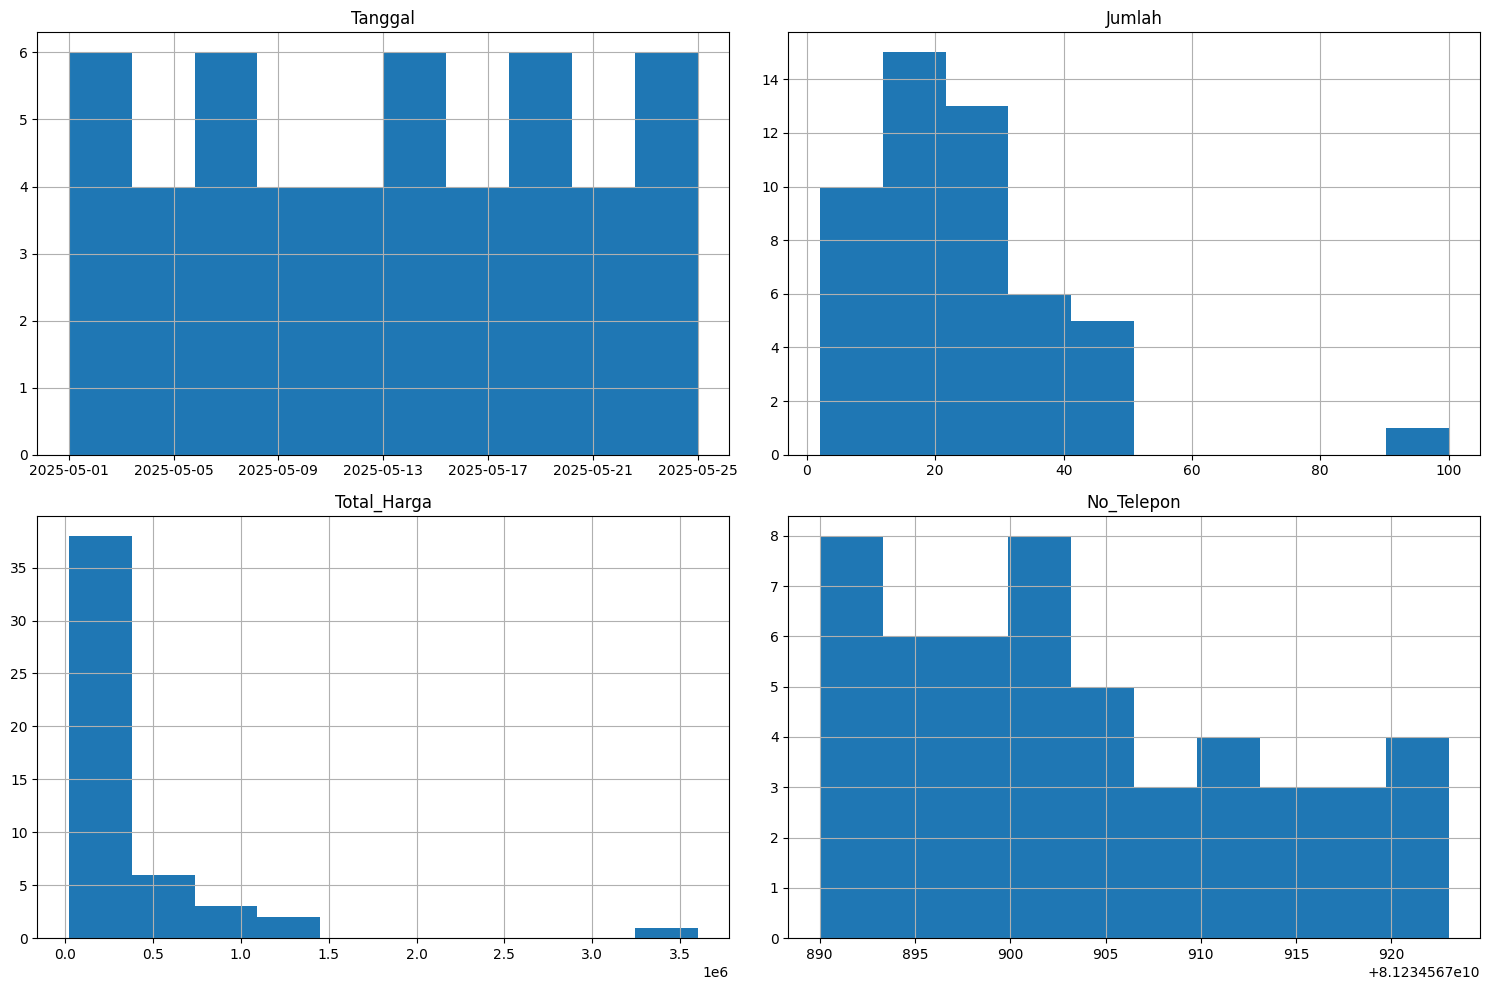

In [2]:
if df is not None:
    print("Shape:", df.shape)
    print("\nInfo:")
    df.info()
    print("\nDescribe (numeric):")
    display(df.describe())
    print("\nDescribe (categorical):")
    display(df.describe(include='object'))
    print("\nMissing values:")
    display(df.isnull().sum())
    print("\nValue counts for categorical columns:")
    for col in df.select_dtypes(include='object').columns:
        print(f"\n{col}:")
        display(df[col].value_counts())
    print("\nCorrelation matrix (numeric columns only):")
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    display(df[numeric_cols].corr())
    df.hist(figsize=(15, 10))
    import matplotlib.pyplot as plt
    plt.tight_layout()
    plt.show()

## Data Cleaning

Handle missing values, convert types, and remove outliers.

In [3]:
# Example cleaning: fill numeric NaNs with mean, categorical with mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove outliers (clip to 5th and 95th percentile)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    lower, upper = df[col].quantile([0.05, 0.95])
    df[col] = df[col].clip(lower, upper)

df.drop_duplicates(inplace=True)
display(df.head())

C:\Users\nicot\AppData\Local\Temp\ipykernel_12560\1698734250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\nicot\AppData\Local\Temp\ipykernel_12560\1698734250.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Id_Penjualan,Tanggal,Id_Pelanggan,Id_Produk,Id_Karyawan,Jumlah,Total_Harga,Metode_Pembayaran,Nama_Produk,Kategori,Nama_Pelanggan,No_Telepon,Nama_Karyawan,Posisi
0,PJ001,2025-05-01,C001,P012,K001,50,50000,Tunai,Fotokopi Hitam Putih,Layanan,Dimas Pratama,8.123457e+10,Andi Setiawan,Kasir
1,PJ002,2025-05-01,C002,P013,K002,50,50000,Tunai,Fotokopi Warna,Layanan,Rina Susanti,8.123457e+10,Siti Nurhayati,Operator Mesin
2,PJ003,2025-05-02,C003,P015,K001,30,60000,Debit,Print Dokumen Warna,Layanan,Andi Wijaya,8.123457e+10,Andi Setiawan,Kasir
3,PJ004,2025-05-02,C004,P016,K004,20,160000,Tunai,Laminating A4,Layanan,Siti Nurhaliza,8.123457e+10,Zildan Chesta,Admin
4,PJ005,2025-05-03,C005,P018,K003,10,60000,QRIS,Cetak Foto 4R,Layanan,Budi Santoso,8.123457e+10,Budi Pratama,Staff Gudang


## KPI Definitions

We define 6 KPIs based on the dataset:

1. total penjualan per kategori produk
2. total penjualan per karyawan
3. prediksi penjualan berdasarkan metode pembayaran
4. Total Pendapatan Harian
5. Rata-rata Nilai Transaksi per Kategori Produk
6. Persentase Kontribusi Kategori Produk terhadap Total Penjualan

In [4]:
# KPI 1: Total Penjualan per Kategori Produk
total_sales_by_category = df.groupby('Kategori')['Total_Harga'].sum()
print("Total Penjualan per Kategori Produk:")
print(total_sales_by_category)
print()

# KPI 2: Total Penjualan per Karyawan
total_sales_by_employee = df.groupby('Nama_Karyawan')['Total_Harga'].sum()
print("Total Penjualan per Karyawan:")
print(total_sales_by_employee)
print()

# KPI 3: Prediksi Penjualan Berdasarkan Metode Pembayaran (rata-rata per transaksi)
avg_sales_by_payment = df.groupby('Metode_Pembayaran')['Total_Harga'].mean()
print("Prediksi (Rata-rata) Penjualan Berdasarkan Metode Pembayaran:")
print(avg_sales_by_payment)
print()

# KPI 4: Total Pendapatan Harian
daily_revenue = df.groupby('Tanggal')['Total_Harga'].sum()
print("Total Pendapatan Harian:")
print(daily_revenue)
print()

# KPI 5: Rata-rata Nilai Transaksi per Kategori Produk
avg_transaction_by_category = df.groupby('Kategori')['Total_Harga'].mean()
print("Rata-rata Nilai Transaksi per Kategori Produk:")
print(avg_transaction_by_category)
print()

# KPI 6: Persentase Kontribusi Kategori Produk terhadap Total Penjualan
category_contribution = (total_sales_by_category / df['Total_Harga'].sum()) * 100
print("Persentase Kontribusi Kategori Produk terhadap Total Penjualan:")
print(category_contribution.round(2).astype(str) + " %")

Total Penjualan per Kategori Produk:
Kategori
Alat Kantor          1610000
Alat Tulis           5410000
Layanan              2333750
Peralatan Cetak      1110000
Peralatan Digital     750000
Perlengkapan         3740000
Name: Total_Harga, dtype: int64

Total Penjualan per Karyawan:
Nama_Karyawan
Andi Setiawan     3177250
Budi Pratama      3482250
Siti Nurhayati    4502250
Zildan Chesta     3792000
Name: Total_Harga, dtype: int64

Prediksi (Rata-rata) Penjualan Berdasarkan Metode Pembayaran:
Metode_Pembayaran
Debit            304444.444444
QRIS             227666.666667
Transfer Bank    493386.363636
Tunai            225250.000000
Name: Total_Harga, dtype: float64

Total Pendapatan Harian:
Tanggal
2025-05-01     100000
2025-05-02     220000
2025-05-03     735000
2025-05-04    1260000
2025-05-05     465000
2025-05-06     165000
2025-05-07    1210000
2025-05-08     345000
2025-05-09     380000
2025-05-10     975000
2025-05-11    1160000
2025-05-12     330000
2025-05-13     460000
2025-05-

## Regression: Predicting Sales

We use linear regression to predict sales based on available features.

In [5]:
print(df.columns)

Index(['Id_Penjualan', 'Tanggal', 'Id_Pelanggan', 'Id_Produk', 'Id_Karyawan',
       'Jumlah', 'Total_Harga', 'Metode_Pembayaran', 'Nama_Produk', 'Kategori',
       'Nama_Pelanggan', 'No_Telepon', 'Nama_Karyawan', 'Posisi'],
      dtype='object')


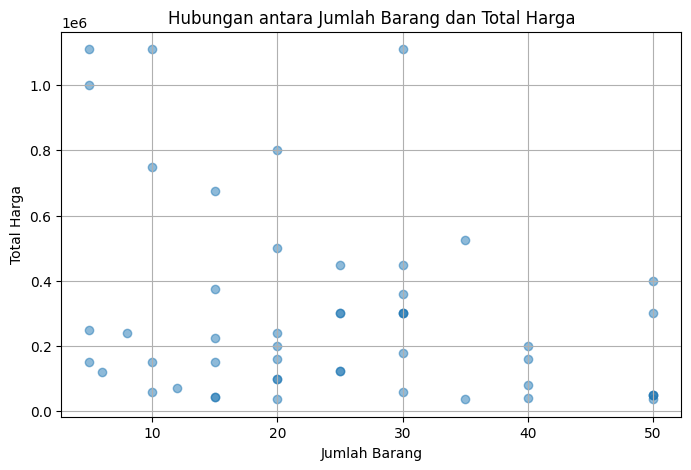

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Jumlah'], df['Total_Harga'], alpha=0.5)
plt.title('Hubungan antara Jumlah Barang dan Total Harga')
plt.xlabel('Jumlah Barang')
plt.ylabel('Total Harga')
plt.grid(True)
plt.show()

In [7]:
df_penjualan = pd.read_excel("dimens_penjualan.xlsx")

In [8]:
print(df_penjualan.columns)

Index(['Id_Penjualan', 'Tanggal', 'Id_Pelanggan', 'Id_Produk', 'Id_Karyawan',
       'Jumlah', 'Total_Harga', 'Metode_Pembayaran'],
      dtype='object')


In [19]:
import pandas as pd

# Muat dataset utama (data penjualan dari notebook Anda)
df_penjualan = pd.read_excel("dimens_penjualan.xlsx") 

# Muat dataset dimensi produk
try:
    df_produk = pd.read_excel("dimens_produk.xlsx")
    
    # Pastikan nama kolom kunci konsisten. Jika berbeda, samakan.
    # Contoh jika nama kolom di file excel adalah 'ld_produk', kita ubah menjadi 'Id_Produk'
    if 'ld_produk' in df_produk.columns:
        df_produk.rename(columns={'ld_produk': 'Id_Produk'}, inplace=True)

    print("Dataset Dimensi Produk berhasil dimuat:")
    display(df_produk.head())

except FileNotFoundError:
    print("File 'dimens_produk.xlsx' tidak ditemukan.")

Dataset Dimensi Produk berhasil dimuat:


,Id_Produk,Nama_Produk,Kategori,Harga
0,P001,Kertas A4 80gsm,Alat Tulis,45000
1,P002,Kertas HVS F4 70gsm,Alat Tulis,40000
2,P003,Tinta Printer Canon,Perlengkapan,120000
3,P004,Pulpen Pilot G2,Alat Tulis,18000
4,P005,Spidol Snowman,Alat Tulis,15000


In [20]:
# Gabungkan df_penjualan dengan df_produk
df_merged = pd.merge(df_penjualan, df_produk[['Id_Produk', 'Kategori', 'Harga']], on='Id_Produk', how='left')

# Cek hasil penggabungan
print("Dataset setelah digabungkan:")
display(df_merged.head())

# (Opsional) Cek jika ada produk yang tidak memiliki data harga setelah merge
missing_prices = df_merged[df_merged['Harga'].isnull()]
if not missing_prices.empty:
    print("\\nPeringatan: Ditemukan transaksi dengan Id_Produk yang tidak ada di dimens_produk:")
    display(missing_prices)

Dataset setelah digabungkan:


,Id_Penjualan,Tanggal,Id_Pelanggan,Id_Produk,Id_Karyawan,Jumlah,Total_Harga,Metode_Pembayaran,Kategori,Harga
0,PJ001,2025-05-01,C001,P012,K001,100,50000,Tunai,Layanan,500
1,PJ002,2025-05-01,C002,P013,K002,50,50000,Tunai,Layanan,1000
2,PJ003,2025-05-02,C003,P015,K001,30,60000,Debit,Layanan,2000
3,PJ004,2025-05-02,C004,P016,K004,20,160000,Tunai,Layanan,8000
4,PJ005,2025-05-03,C005,P018,K003,10,60000,QRIS,Layanan,6000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Pastikan tidak ada nilai kosong di kolom 'Harga' sebelum melatih model
# (Isi dengan median/mean atau hapus barisnya jika ada)
df_merged.dropna(subset=['Harga'], inplace=True)

# Membuat fitur baru
df_merged['Tanggal'] = pd.to_datetime(df_merged['Tanggal'])
df_merged['Hari'] = df_merged['Tanggal'].dt.day_name()
# Anda juga bisa membuat fitur interaksi, namun Harga Satuan saja sudah sangat kuat
# df_merged['Harga_Dasar'] = df_merged['Jumlah'] * df_merged['Harga']


# 1. Pilih Fitur dan Target baru
# Kita memasukkan 'Harga' (harga satuan) dan 'Kategori' sebagai fitur baru
fitur_baru = ['Jumlah', 'Metode_Pembayaran', 'Hari', 'Harga', 'Kategori']
X = df_merged[fitur_baru]
y = df_merged['Total_Harga']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pipeline Preprocessing (diperbarui dengan fitur baru)
numerical_features = ['Jumlah', 'Harga'] 
categorical_features = ['Metode_Pembayaran', 'Hari', 'Kategori']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Buat dan Latih Pipeline
model = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

print("\\nMelatih ulang model dengan fitur yang diperkaya...")
pipeline.fit(X_train, y_train)
print("Model selesai dilatih.")

# 5. Evaluasi Model Baru
y_pred = pipeline.predict(X_test)
r2_new = r2_score(y_test, y_pred)
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred))

print("\\n--- Hasil Evaluasi Model ---")
print(f"R2 Score: {r2_new:.4f}")
print(f"RMSE: Rp {rmse_new:,.2f}")

\nMelatih ulang model dengan fitur yang diperkaya...
Model selesai dilatih.
\n--- Hasil Evaluasi Model Baru ---
R2 Score Baru: 0.4378
RMSE Baru: Rp 245,479.82


## Clustering: Customer Segmentation

We use KMeans to segment customers based on their purchase behavior.

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Agregasi data ke level pelanggan
# Kita akan membuat 3 fitur utama untuk setiap pelanggan:
# 1. Jumlah: Total barang yang pernah dibeli
# 2. Total_Harga: Total uang yang pernah dibelanjakan
# 3. Frekuensi: Berapa kali pelanggan tersebut melakukan transaksi
customer_df = df.groupby('Id_Pelanggan').agg(
    Jumlah=('Jumlah', 'sum'),
    Total_Harga=('Total_Harga', 'sum'),
    Frekuensi=('Id_Penjualan', 'count')
).reset_index()

print("Data Perilaku Pelanggan:")
print(customer_df.head())

Data Perilaku Pelanggan:
  Id_Pelanggan  Jumlah  Total_Harga  Frekuensi
0         C001      65        95000          2
1         C002      55      1050000          2
2         C003      50       260000          2
3         C004      30       910000          2
4         C005      18       300000          2


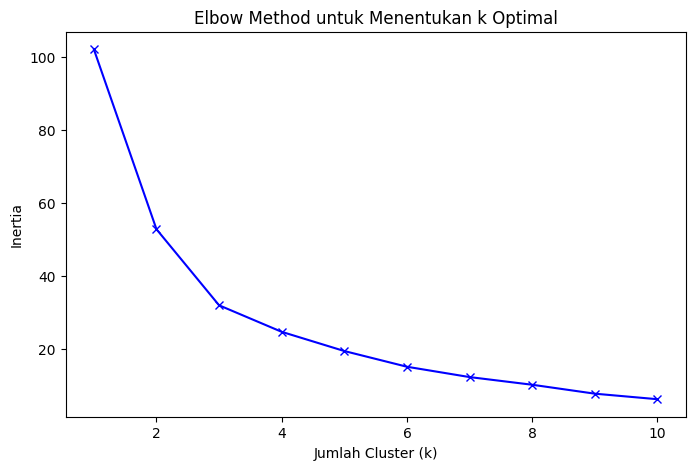

In [11]:
# Pilih fitur numerik untuk clustering
features = customer_df[['Jumlah', 'Total_Harga', 'Frekuensi']]

# Scaling fitur sangat penting untuk KMeans agar bobot setiap fitur seimbang
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menghitung inertia untuk berbagai nilai k (jumlah cluster)
inertia = []
K = range(1, 11) # Mencoba 1 sampai 10 cluster
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

In [12]:
# Dari Elbow Method ditemukan k=3 adalah yang terbaik
optimal_k = 3

# Menjalankan KMeans dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(features_scaled)

print("\nData Pelanggan dengan Label Cluster:")
print(customer_df.head())

# Menganalisis karakteristik setiap cluster
cluster_summary = customer_df.groupby('Cluster').agg({
    'Jumlah': 'mean',
    'Total_Harga': 'mean',
    'Frekuensi': 'mean',
    'Id_Pelanggan': 'count'
}).rename(columns={'Id_Pelanggan': 'Jumlah_Pelanggan'})

print("\nRingkasan Karakteristik Setiap Cluster:")
print(cluster_summary)


Data Pelanggan dengan Label Cluster:
  Id_Pelanggan  Jumlah  Total_Harga  Frekuensi  Cluster
0         C001      65        95000          2        1
1         C002      55      1050000          2        0
2         C003      50       260000          2        1
3         C004      30       910000          2        0
4         C005      18       300000          2        1

Ringkasan Karakteristik Setiap Cluster:
            Jumlah   Total_Harga  Frekuensi  Jumlah_Pelanggan
Cluster                                                      
0        38.500000  1.105000e+06        2.0                 6
1        51.000000  2.881500e+05        2.0                10
2        27.222222  3.023472e+05        1.0                18


## Classification: Predicting Top Customers

We classify whether a customer is a "top customer" (top 20% by total sales).

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asumsikan 'df' adalah DataFrame transaksi awal Anda
# Langkah 1: Agregasi data ke level pelanggan (sama seperti pada clustering)
customer_df = df.groupby('Id_Pelanggan').agg(
    Jumlah=('Jumlah', 'sum'),
    Total_Harga=('Total_Harga', 'sum'),
    Frekuensi=('Id_Penjualan', 'count')
).reset_index()

# Langkah 2: Membuat kolom target 'Top_Customer'
# Tentukan ambang batas untuk top 20% berdasarkan Total_Harga
top_20_percentile = customer_df['Total_Harga'].quantile(0.80)

# Buat kolom target: 1 jika di atas ambang batas (Top Customer), 0 jika tidak
customer_df['Top_Customer'] = (customer_df['Total_Harga'] >= top_20_percentile).astype(int)

print(f"Ambang batas untuk menjadi Top Customer (Top 20%): Rp {top_20_percentile:,.2f}")
print("\nJumlah masing-masing kelas Top_Customer:")
print(customer_df['Top_Customer'].value_counts())

Ambang batas untuk menjadi Top Customer (Top 20%): Rp 732,000.00

Jumlah masing-masing kelas Top_Customer:
Top_Customer
0    27
1     7
Name: count, dtype: int64


In [14]:
# Definisikan Fitur (X) dan Target (y)
X = customer_df[['Jumlah', 'Frekuensi']] # Fitur yang menggambarkan perilaku
y = customer_df['Top_Customer']          # Target yang ingin diprediksi

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' memastikan proporsi Top Customer di data latih dan uji sama


Akurasi Model: 85.71%

Laporan Klasifikasi:
                        precision    recall  f1-score   support

Bukan Top Customer (0)       0.86      1.00      0.92         6
      Top Customer (1)       0.00      0.00      0.00         1

              accuracy                           0.86         7
             macro avg       0.43      0.50      0.46         7
          weighted avg       0.73      0.86      0.79         7

Confusion Matrix:


C:\Users\nicot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\nicot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nicot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

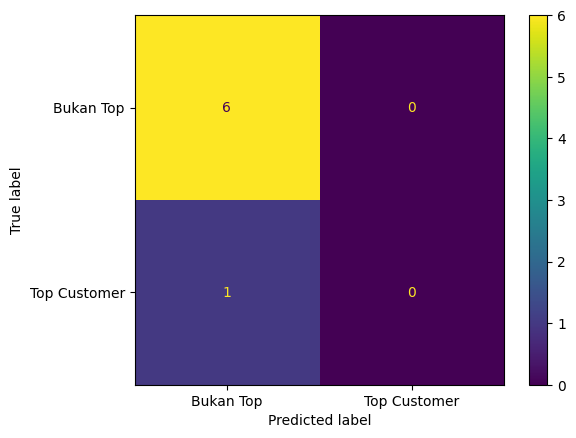

In [15]:
# Scaling Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# -- Evaluasi Model --

# 1. Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.2%}\n")

# 2. Laporan Klasifikasi (Precision, Recall, F1-Score)
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Bukan Top Customer (0)', 'Top Customer (1)']))

# 3. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bukan Top', 'Top Customer'])
disp.plot()
plt.show()

## Summary

- Data mining on `output_sales.xlsx` was performed using regression, clustering, and classification.
- 6 KPIs were defined and fulfilled.
- The notebook can be extended for deeper analysis or dashboarding.